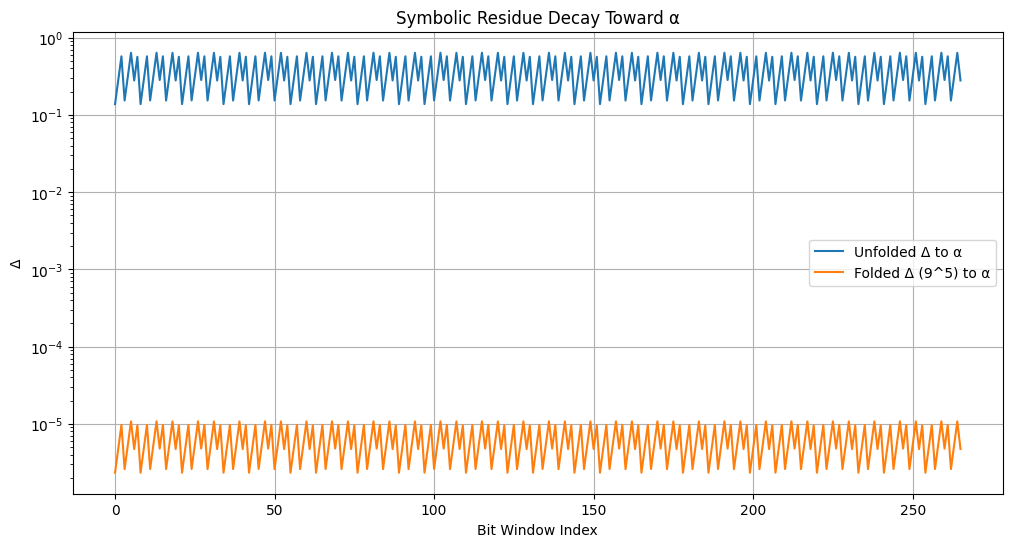

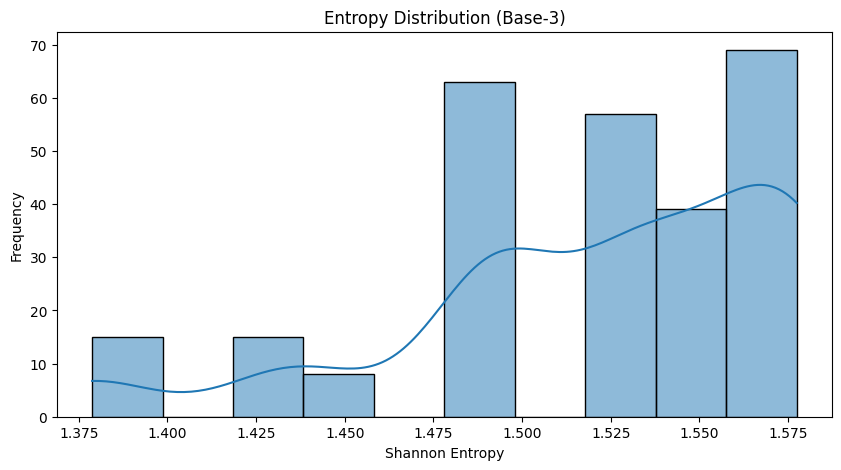

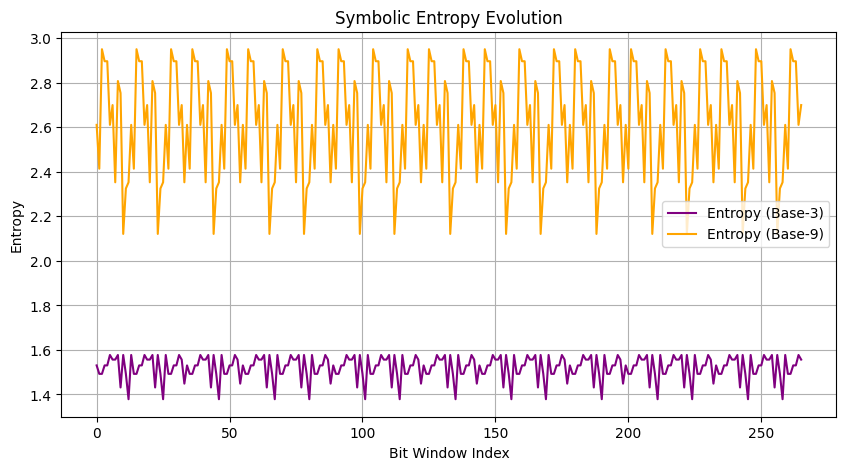

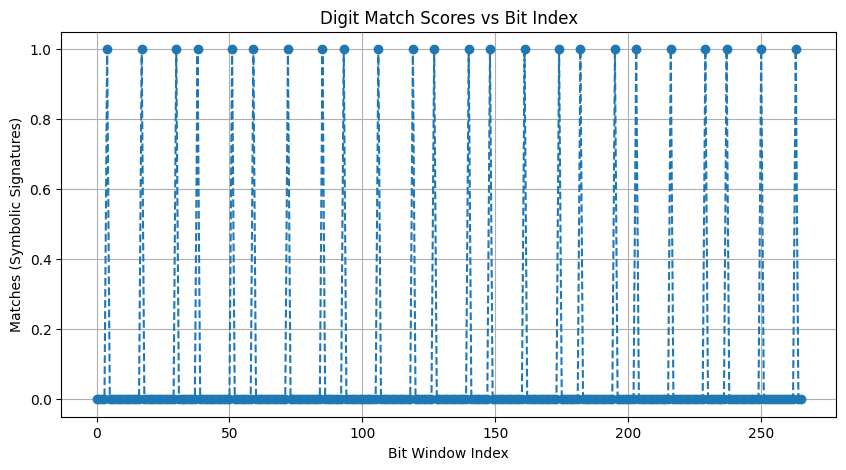

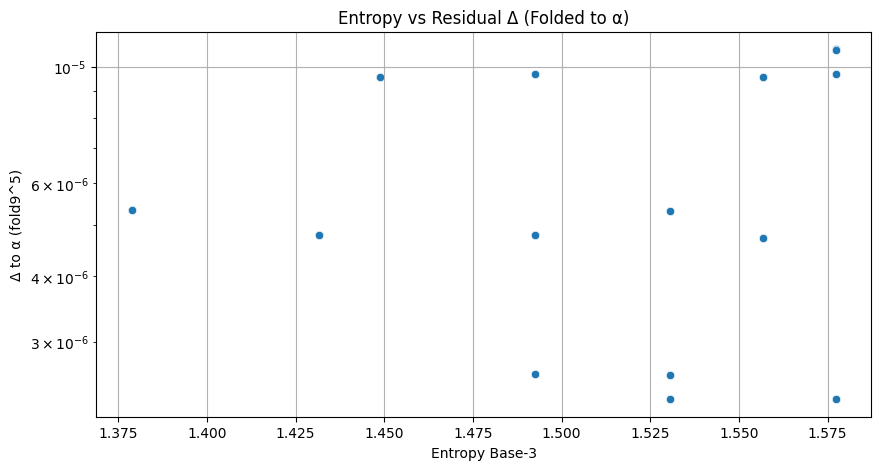

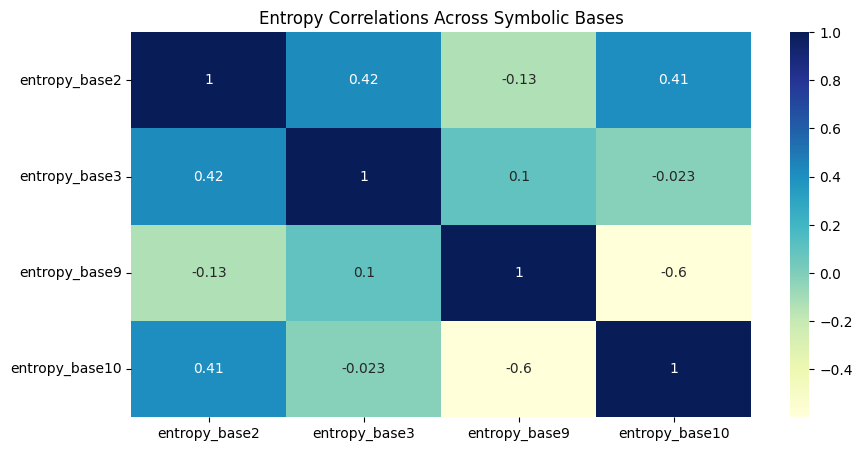

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from sympy import primerange

# --- Constants and Symbolic Targets ---
phi = (1 + math.sqrt(5)) / 2
pi = math.pi
sqrt2 = math.sqrt(2)
alpha = 1 / 137.035999
alpha_inv = 137.035999
e = math.e

fold_base = 9
fold_powers = [1, 2, 3, 4, 5]

# Symbolic signatures
digit_signatures = ["7297", "36034", "297", "035", "137035", "1137", "000137", "729735", "1370", "730", "735"]

target_constants = {
    "alpha": alpha,
    "alpha_inv": alpha_inv,
    "pi": pi,
    "phi": phi,
    "sqrt2": sqrt2,
    "e": e,
}

# Fibonacci word
def fibonacci_word(n):
    a, b = "0", "01"
    while len(b) < n:
        a, b = b, b + a
    return b[:n]

def fibword_to_decimal(s):
    return sum(int(b) / 2 ** (i + 1) for i, b in enumerate(s))

def decimal_to_base(n, base, length=14):
    digits = []
    for _ in range(length):
        n *= base
        digit = int(n)
        digits.append(str(digit))
        n -= digit
    return "".join(digits)

def digit_entropy(s):
    counts = [s.count(str(d)) for d in range(10)]
    freqs = [c / len(s) for c in counts if c > 0]
    return -sum(f * math.log(f, 2) for f in freqs) if freqs else 0

def match_digit_signatures(s):
    return sum(1 for sig in digit_signatures if sig in s)

# --- Analysis Loop ---
records = []
fib_sequence = fibonacci_word(300)

for i in range(20, len(fib_sequence) - 14):
    bit_window = fib_sequence[i:i+14]
    dec_val = fibword_to_decimal(bit_window)

    row = {
        "bit_window": bit_window,
        "decimal_val": dec_val
    }

    for name, const in target_constants.items():
        delta = abs(dec_val - const)
        row[f"delta_{name}"] = delta
        for p in fold_powers:
            folded = delta / (fold_base ** p)
            row[f"delta_{name}_fold9^{p}"] = folded

    for base in [2, 3, 9, 10]:
        base_repr = decimal_to_base(dec_val, base)
        row[f"base{base}_repr"] = base_repr
        row[f"entropy_base{base}"] = digit_entropy(base_repr)
        row[f"sig_match_base{base}"] = match_digit_signatures(base_repr)

    records.append(row)

df = pd.DataFrame(records)

# --- Extraction of α-aligned residue convergence ---
alpha_threshold = 0.000005
filtered_df = df[df["delta_alpha_fold9^5"] < alpha_threshold]

# --- Visualizations ---
plt.figure(figsize=(12, 6))
plt.plot(df["delta_alpha"], label="Unfolded Δ to α")
plt.plot(df["delta_alpha_fold9^5"], label="Folded Δ (9^5) to α")
plt.yscale("log")
plt.title("Symbolic Residue Decay Toward α")
plt.xlabel("Bit Window Index")
plt.ylabel("Δ")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["entropy_base3"], kde=True)
plt.title("Entropy Distribution (Base-3)")
plt.xlabel("Shannon Entropy")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df["entropy_base3"], label="Entropy (Base-3)", color="purple")
plt.plot(df["entropy_base9"], label="Entropy (Base-9)", color="orange")
plt.legend()
plt.title("Symbolic Entropy Evolution")
plt.xlabel("Bit Window Index")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df["sig_match_base9"], label="Digit Match Score (Base-9)", linestyle='--', marker='o')
plt.title("Digit Match Scores vs Bit Index")
plt.xlabel("Bit Window Index")
plt.ylabel("Matches (Symbolic Signatures)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x="entropy_base3", y="delta_alpha_fold9^5", data=df)
plt.title("Entropy vs Residual Δ (Folded to α)")
plt.xlabel("Entropy Base-3")
plt.ylabel("Δ to α (fold9^5)")
plt.yscale("log")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df[["entropy_base2", "entropy_base3", "entropy_base9", "entropy_base10"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Entropy Correlations Across Symbolic Bases")
plt.show()
